In [1]:
import cv2,matplotlib.pyplot as plt,dlib,imutils
from imutils import face_utils

In [2]:
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("./shape_predictor_68_face_landmarks.dat")

In [12]:
image=plt.imread("./IMG_20181213.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
rects = detector(gray, 1)
rects

rectangles[[(2044, 1103) (2429, 1488)], [(428, 1242) (1093, 1907)], [(1525, 1204) (1846, 1525)], [(2643, 1018) (3029, 1403)]]

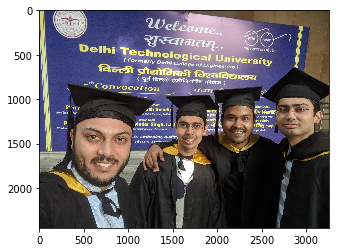

In [13]:
plt.imshow(image)

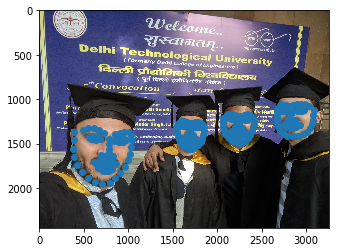

In [23]:
x_coord = []
y_coord = []
final_array = []
for rect in rects:
    pred=predictor(gray,rect)
    x_coord.extend(face_utils.shape_to_np(pred)[:,0])
    y_coord.extend(face_utils.shape_to_np(pred)[:,1])  
    final_array.extend(face_utils.shape_to_np(pred))
    
fig, ax1 = plt.subplots()
ax1.imshow(image)
ax1.scatter(x_coord,y_coord)

In [26]:
import pandas as pd
pd.DataFrame(final_array,columns=['x','y']).to_csv('landmark_pts.csv')

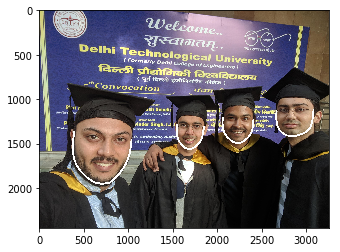

In [30]:
import cv2    
color = (255, 255, 255)
thickness = 20

for rect in rects:
    pred=predictor(gray,rect)
    jaw = face_utils.shape_to_np(pred)[0:17]
    cv2.polylines(image, [jaw], False, color, thickness)
#     break
    
fig, ax1 = plt.subplots()
ax1.imshow(image)

In [34]:
plt.imsave('jawline.jpg',image)

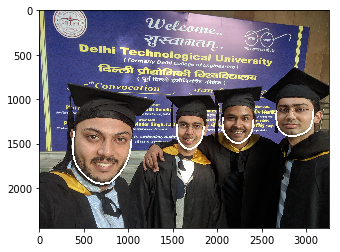

In [35]:
# plt.imshow(plt.imread("./jawline.jpg"))